<h1 align=center><font size = 8>Situación Covid-19 en Galicia</font></h1>

El propósito de este notebook es capturar de la <a href="https://coronavirus.sergas.gal/datos/#/gl-ES/undefined">web del Sergas</a> los datos actualizados de la situación de Galicia frente al Covid-19, y posteriormente realizar algunos análisis básicos, guardando los resultados en directorios.

Para los cálculos basados en el número de habitantes se emplea un fichero csv obteniendo mediante otro notebook, llamado _Población Areas_ y también disponible en el repositorio de GitHub. Se debe de tener en cuenta que en este análisis se trabaja con áreas sanitarias y no con ayuntamientos. Pese a que todos los nombres de las áreas sanitarias coinciden también con nombres de ayuntamientos, en ellas se encuentran englobadas otras comarcas y ayuntamientos limítrofes y próximas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
import sys
import requests
import datetime
import os

# 1. Importación de datos

## 1.1. Población por área sanitaria

Para futuros cálculos, es necesario contar con la población de las áreas sanitarias. El fichero csv empleado ha sido anteriormente obtenido en el notebook _Poblacion Areas_ 

In [2]:
df_areas = pd.read_csv('poblacion.csv')
df_areas

,Area sanitaria,Habitantes
0,A Coruña,550024
1,Ferrol,192136
2,Lugo,333631
3,Ourense,311674
4,Pontevedra,307877
5,Santiago,448118
6,Vigo,564814


## 1.2. Datos Covid-19 actuales

El Sergas tiene disponible una página web con estadísticas del Covid-19 en Galicia, con los siguientes ficheros de información:
<ul>
    <li>ActivosCuradosFallecidos</li>
    <li>CifrasTotais</li>
    <li>Fallecidos</li>
    <li>InfectadosPorFecha</li>
    <li>OcupacionCamasHospital</li>
    <li>PorcentajeInfeccionesPorFecha</li>
    <li>PorcentajeInfectadosPorGenero</li>
</ul>

Antes de proceder con la lectura de los datos, comprobaremos cuál es la última versión y preparemos el repositorio para guardar las gráficas:

In [3]:
#Ruta de la web donde están los ficheros
path = 'https://coronavirus.sergas.gal/infodatos/'
#Fichero con el que vamos a realizar la prueba para obtener la fecha
file = '_COVID19_Web_CifrasTotais.csv'

#Obtiene el día 'datefile' más reciente en los ficheros
for i in range(0,10):
    datefile = (date.today() - timedelta(days=i)).strftime("%Y-%m-%d")
    filepath = path+datefile+file
    response = requests.head(filepath)
    if response.status_code == requests.codes.ok:
        print('Ultima actualización: '+datefile)
        break;
    elif i == 9:
        print('Algo ha ido mal. La web lleva muchos días sin actualizarse o ha cambiado su estructura')
    
#Para simplificar la nomenclatura de las áreas
dict_areas={'A.S. A CORUÑA E CEE':'A Coruña',
            'A.S. FERROL':'Ferrol',
            'A.S. LUGO, A MARIÑA E MONFORTE':'Lugo',
            'A.S. OURENSE, VERÍN E O BARCO':'Ourense',
            'A.S. PONTEVEDRA E O SALNÉS':'Pontevedra',
            'A.S. SANTIAGO E BARBANZA':'Santiago',
            'A.S. VIGO':'Vigo'
           }

savepath = datefile
try:
    os.mkdir(savepath)
except OSError:
    print('No se ha podido crear el directorio')
else:
    print('El directorio ya existe')
os.chdir(savepath)

Ultima actualización: 2020-10-19
No se ha podido crear el directorio


### 1.2.1. ActivosCuradosFallecidos

In [4]:
#Nombre del archivo
file = '_COVID19_Web_ActivosCuradosFallecidos.csv'

#Leemos el fichero
df_acf = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_acf['Area_Sanitaria'] = df_acf['Area_Sanitaria'].replace(dict_areas)
df_acf['Fecha'] = pd.to_datetime(df_acf['Fecha'])
#df_acf = df_acf[df_acf['Area_Sanitaria'] != 'GALICIA']

df_acf.tail()

,Fecha,Area_Sanitaria,Pacientes_Sin_Alta,Pacientes_Con_Alta,Exitus
1859,2020-10-19,Ourense,1479,3775,197
1860,2020-10-19,Pontevedra,481,2181,26
1861,2020-10-19,Santiago,813,3857,126
1862,2020-10-19,Vigo,831,3382,140
1863,2020-10-19,GALICIA,5215,23812,831


### 1.2.2. CifrasTotais

In [5]:
#Nombre del archivo
file = '_COVID19_Web_CifrasTotais.csv'

#Leemos el fichero
df_cift = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_cift['Fecha'] = [(d[0]) for d in df_cift['Fecha'].str.split(' ')]
df_cift['Fecha'] = pd.to_datetime(df_cift['Fecha'])
df_cift['Area_Sanitaria'] = df_cift['Area_Sanitaria'].replace(dict_areas)
df_cift = df_cift[df_cift['Area_Sanitaria'] != 'GALICIA']

df_cift

,Fecha,Area_Sanitaria,Casos_Totais,Casos_Confirmados_PCR_Ultimas24h,Pacientes_Sin_Alta,Pacientes_Con_Alta,Camas_Ocupadas_HOS,Camas_Ocupadas_UCI,Probas_Realizadas_PCR,Probas_Realizadas_Non_PCR,Exitus
0,2020-10-19,A Coruña,7585,62,876,6494,51,9,141147,64988,215
1,2020-10-19,Ferrol,1348,25,238,1075,11,2,40646,25833,35
2,2020-10-19,Lugo,3637,24,497,3048,18,3,69400,64881,92
3,2020-10-19,Ourense,5451,66,1479,3776,108,15,80991,61877,197
4,2020-10-19,Pontevedra,2688,31,481,2181,20,4,55071,37074,26
5,2020-10-19,Santiago,4796,87,813,3856,40,7,94292,80295,126
6,2020-10-19,Vigo,4353,48,831,3382,29,7,114788,50140,140


### 1.2.3. Fallecidos

In [6]:
#Nombre del archivo
file = '_COVID19_Web_Fallecidos.csv'

#Leemos el fichero
df_rip = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_rip['Area_Sanitaria'] = df_rip['Area_Sanitaria'].replace(dict_areas)
# df_rip = df_rip[df_rip['Area_Sanitaria'] != 'GALICIA']

df_rip.head()

,Area_Sanitaria,Grupo_Edad,Fallecidos,Porcentaje
0,GALICIA,0-9,0,0%
1,GALICIA,10-19,0,0%
2,GALICIA,20-29,0,0%
3,GALICIA,30-39,2,"0,24%"
4,GALICIA,40-49,2,"0,24%"


### 1.2.4. Infectados

In [7]:
#Nombre del archivo
file = '_COVID19_Web_InfectadosPorFecha.csv'

#Leemos el fichero
df_inf = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_inf['Area_Sanitaria'] = df_inf['Area_Sanitaria'].replace(dict_areas)
df_inf['Fecha'] = pd.to_datetime(df_inf['Fecha'])
# df_inf = df_inf[df_inf['Area_Sanitaria'] != 'GALICIA']

df_inf.tail()

,Fecha,Area_Sanitaria,Personas_Infectadas
1386,2020-10-19,Ourense,21
1387,2020-10-19,Pontevedra,19
1388,2020-10-19,Santiago,56
1389,2020-10-19,Vigo,28
1390,2020-10-19,GALICIA,188


### 1.2.5. OcupacionCamas

In [8]:
#Nombre del archivo
file = '_COVID19_Web_OcupacionCamasHospital.csv'

#Leemos el fichero
df_cama = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_cama['Fecha'] = [(d[0]) for d in df_cama['Fecha'].str.split(' ')]
df_cama['Fecha'] = pd.to_datetime(df_cama['Fecha'])
df_cama['Area_Sanitaria'] = df_cama['Area_Sanitaria'].replace(dict_areas)
df_cama = df_cama[df_cama['Area_Sanitaria'] != 'GALICIA']

df_cama.head()

,Fecha,Area_Sanitaria,Hospital,Tipo_Hospital,Camas_Ocupadas_HOS,Camas_Ocupadas_UC
0,2020-10-19,A Coruña,CENTRO ONCOLOXICO DE GALICIA,PRIVADO,0,0
1,2020-10-19,A Coruña,C.H.U. A CORUÑA,PÚBLICO,49,7
2,2020-10-19,A Coruña,HM MODELO-BELEN,PRIVADO,0,2
3,2020-10-19,A Coruña,HOSPITAL QUIRONSALUD A CORUÑA,PRIVADO,1,0
4,2020-10-19,A Coruña,HOSPITAL SAN RAFAEL,PRIVADO,0,0


### 1.2.6. PorcentajeInfeccionesPorFecha

In [9]:
#Nombre del archivo
file = '_COVID19_Web_PorcentajeInfeccionesPorFecha.csv'

#Leemos el fichero
df_per_inf = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_per_inf['Area_Sanitaria'] = df_per_inf['Area_Sanitaria'].replace(dict_areas)
df_per_inf['Fecha'] = pd.to_datetime(df_per_inf['Fecha'])
df_per_inf['Porcentaje_Infecciones'] = [float(p[0].replace(',','.')) for p in df_per_inf['Porcentaje_Infecciones'].str.split('%')]
df_per_inf.rename(columns={'Area_Sanitaria':'Area',
                           'Casos_Abiertos':'Positivos',
                           'Pruebas_PCR_Realizadas':'PCR',
                           'Porcentaje_Infecciones':'%Infecciones'},
                  inplace=True)

df_per_inf.tail()

,Fecha,Area,Positivos,PCR,%Infecciones
1879,2020-10-19,Ourense,21,242,8.68
1880,2020-10-19,Pontevedra,19,246,7.72
1881,2020-10-19,Santiago,56,431,12.99
1882,2020-10-19,Vigo,28,397,7.05
1883,2020-10-19,GALICIA,188,2400,7.83


### 1.2.7. PorcentajeInfectadosGenero

In [10]:
#Nombre del archivo
file = '_COVID19_Web_PorcentajeInfectadosPorGenero.csv'

#Leemos el fichero
df_sex = pd.read_csv(path+datefile+file, decimal=',', thousands='.')

#Realizamos tareas para simplificar el formato
df_sex['Area_Sanitaria'] = df_sex['Area_Sanitaria'].replace(dict_areas)
# df_cama = df_cama[df_cama['Area_Sanitaria'] != 'GALICIA']

df_sex.head()

,Area_Sanitaria,Genero,Personas_Infectadas,Porcentaje
0,GALICIA,HOMES,12346,"45,72%"
1,GALICIA,MULLERES,14659,"54,28%"
2,A Coruña,HOMES,3187,"46,11%"
3,A Coruña,MULLERES,3725,"53,89%"
4,Ferrol,HOMES,530,"44,54%"


# 2. Análisis

## 2.1. Casos activos - Total por área sanitaria

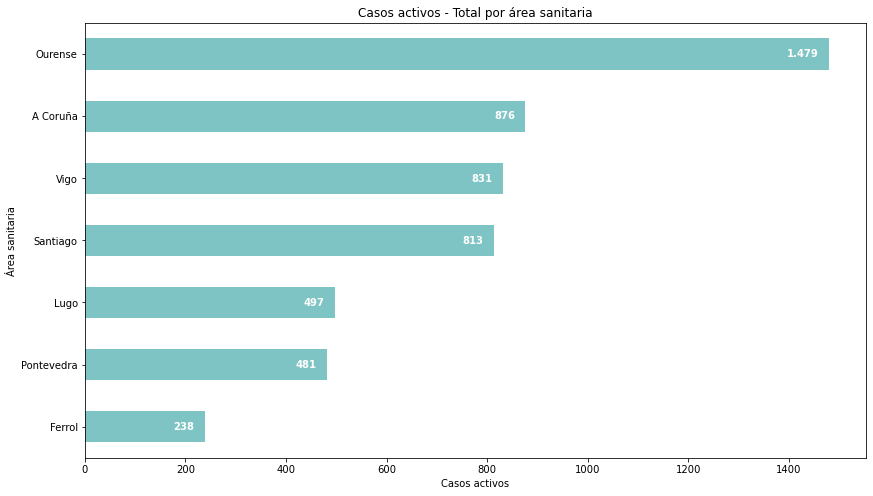

In [11]:
df_cift[['Area_Sanitaria','Pacientes_Sin_Alta']].sort_values('Pacientes_Sin_Alta').plot(kind='barh', 
                                                                                        x='Area_Sanitaria', 
                                                                                        legend=False, 
                                                                                        figsize=(14,8), 
                                                                                        color='darkcyan', 
                                                                                        alpha=0.5)

plt.title('Casos activos - Total por área sanitaria')
plt.xlabel('Casos activos')
plt.ylabel('Área sanitaria')

values = list(df_cift[['Pacientes_Sin_Alta']].sort_values('Pacientes_Sin_Alta')['Pacientes_Sin_Alta'])
for i,val in enumerate(values):
    label = format(int(val), ',').replace(',','.')
    plt.annotate(label,                 
                 xy=(val-20,i),       
                 color='white',         
                 fontweight='semibold', 
                 ha='right',            
                 va='center'             
                )
  
plt.savefig(datefile+'_casos_activos_total.png')    
    
plt.show()

## 2.2. Casos activos - Porcentaje por área sanitaria

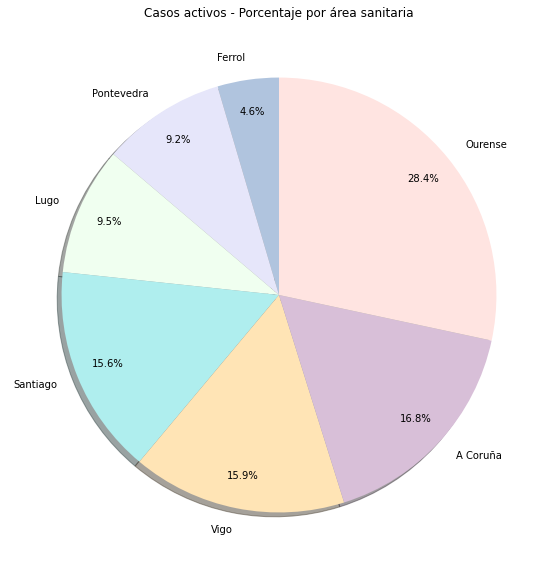

In [12]:
colors=['lightsteelblue','lavender','honeydew','paleturquoise','moccasin','thistle','mistyrose']
df_percnt = df_cift[['Area_Sanitaria','Pacientes_Sin_Alta']].sort_values('Pacientes_Sin_Alta')
df_percnt[['Pacientes_Sin_Alta']].plot(kind='pie',labels=df_percnt['Area_Sanitaria'],subplots=True,
                                       figsize=(10,10),shadow=True,startangle=90,pctdistance=0.85,
                                       autopct='%1.1f%%',colors=colors,legend=False)

plt.title('Casos activos - Porcentaje por área sanitaria')
plt.ylabel(None)

plt.savefig(datefile+'_casos_activos_porcentaje.png') 
plt.show()

## 2.3. Casos activos por 100.000 habitantes

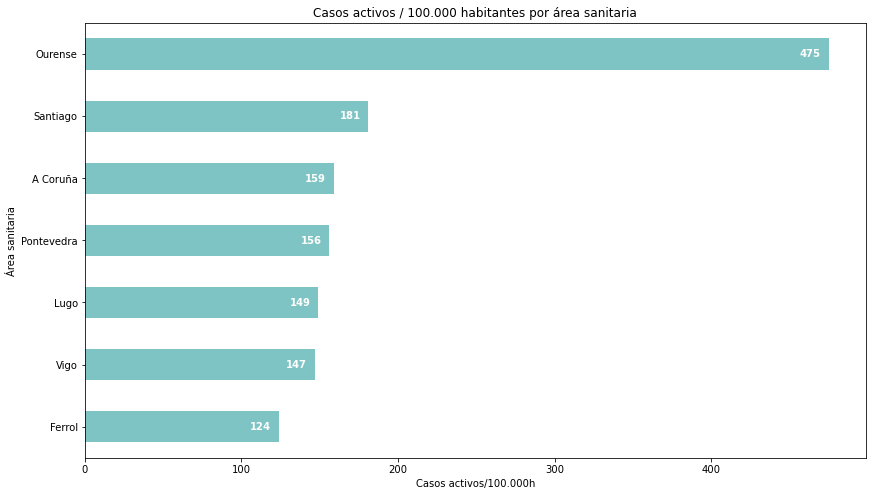

In [13]:
df = pd.merge(how='inner', 
                  left=df_cift, 
                  right=df_areas, 
                  left_on='Area_Sanitaria', 
                  right_on='Area sanitaria')
df['100.000h'] = round((df['Pacientes_Sin_Alta']*100000)/df['Habitantes'])

df = df.sort_values('100.000h')
df.plot(kind='barh', x='Area_Sanitaria', y='100.000h', legend=False, figsize=(14,8), color='darkcyan', alpha=0.5)

plt.title('Casos activos / 100.000 habitantes por área sanitaria')
plt.xlabel('Casos activos/100.000h')
plt.ylabel('Área sanitaria')

for i,val in enumerate(df['100.000h']):
     label = format(int(val), ',').replace(',','.')
     plt.annotate(label,                 
                  xy=(val-5,i),       
                  color='white',         
                  fontweight='semibold', 
                  ha='right',            
                  va='center'             
                 )
plt.savefig(datefile+'_casos_activos_100000h.png')    
    
plt.show()

## 2.4. Positivos

### 2.4.1. Evolución de positivos diarios

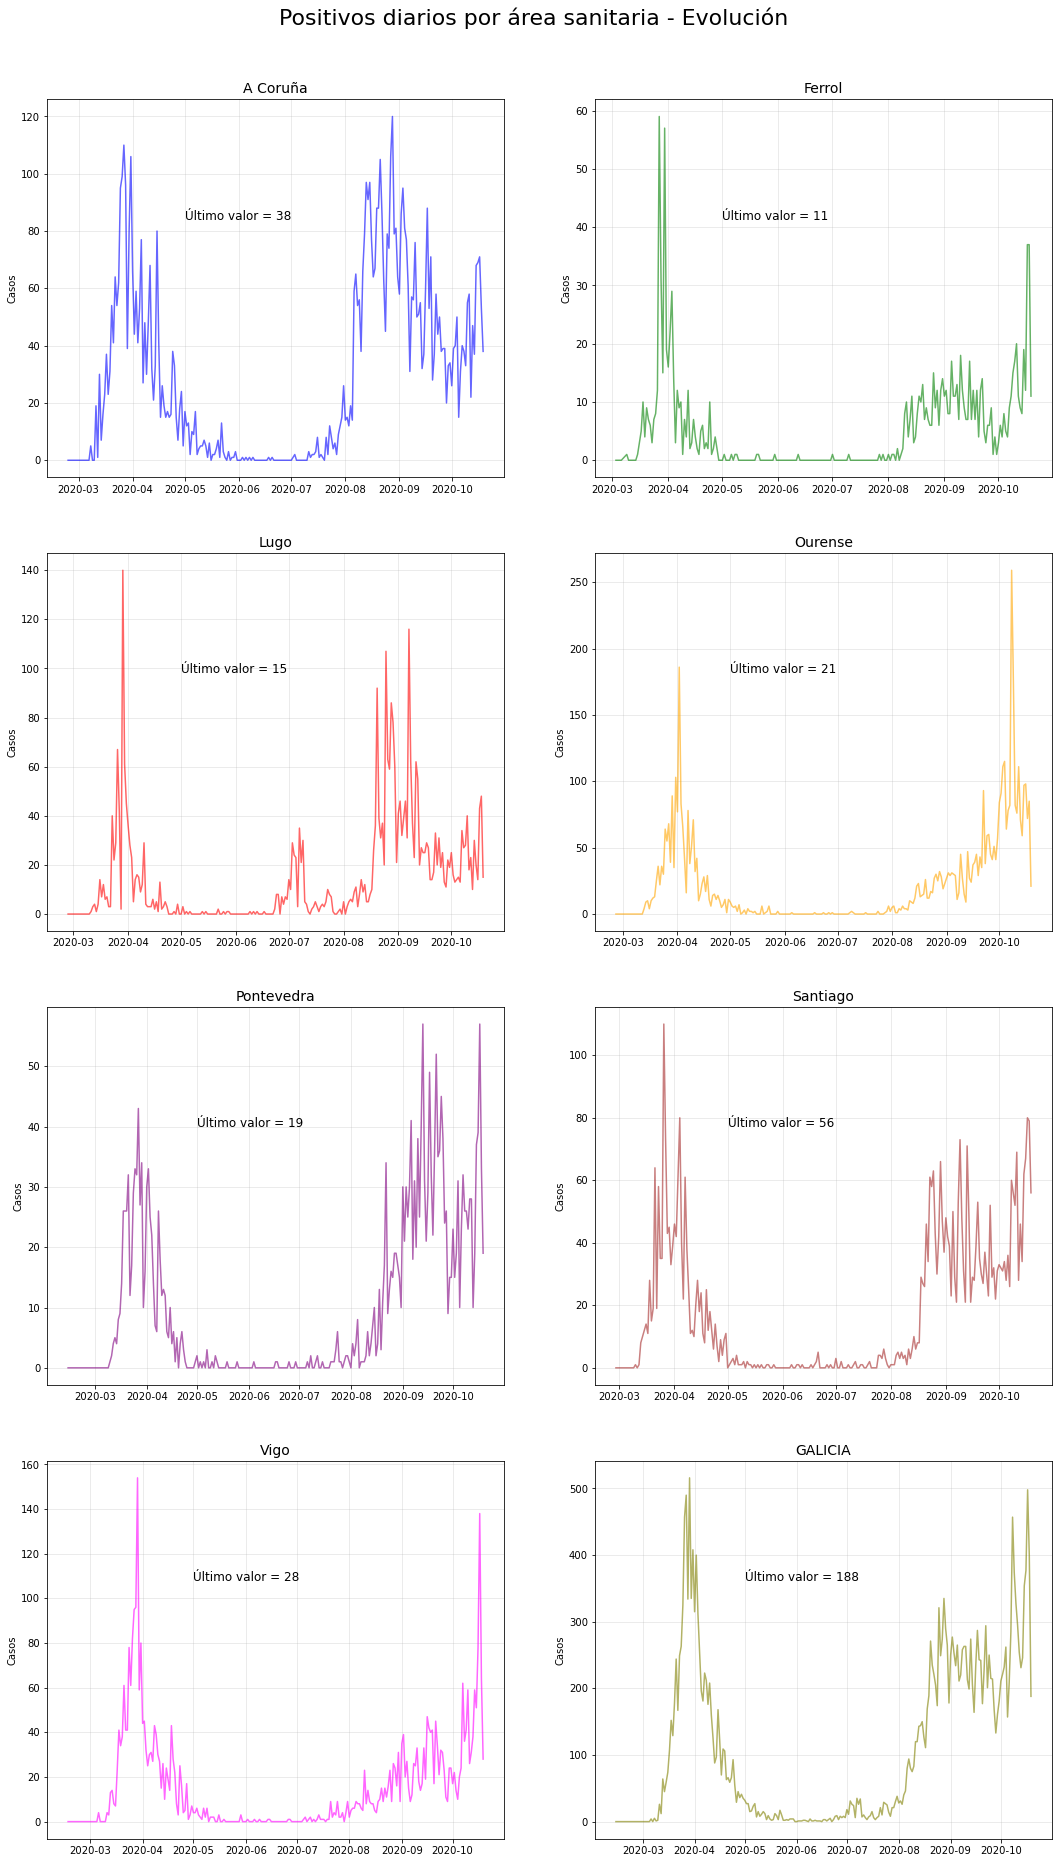

In [14]:
areas = ['A Coruña', 'Ferrol', 'Lugo', 'Ourense', 'Pontevedra', 'Santiago', 'Vigo', 'GALICIA']
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'magenta', 'olive']

fig, axes = plt.subplots(4,2)
fig.set_size_inches(18,32)
fig.suptitle('Positivos diarios por área sanitaria - Evolución', fontsize=22, y=0.92)

for i,ax in enumerate(axes.flatten()):
    df_temp = df_per_inf[['Fecha','Positivos']][df_per_inf['Area']==areas[i]]

    ax.plot(df_temp['Fecha'],df_temp['Positivos'],color=colors[i],alpha=0.6)
    text_print = 'Último valor = ' + str(df_temp['Positivos'].iloc[-1])
    ax.text(datetime.datetime.strptime('2020-05-01','%Y-%m-%d'),
            df_temp['Positivos'].max()*0.7,
            text_print, color='black', size=12)
    ax.grid(alpha=0.3)
    ax.set_title(areas[i], fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('Casos')    

plt.savefig(datefile+'_positivos_diarios.png', dpi=90)

plt.show()

### 2.4.2. Evolución positivos acumulados últimos 7 días

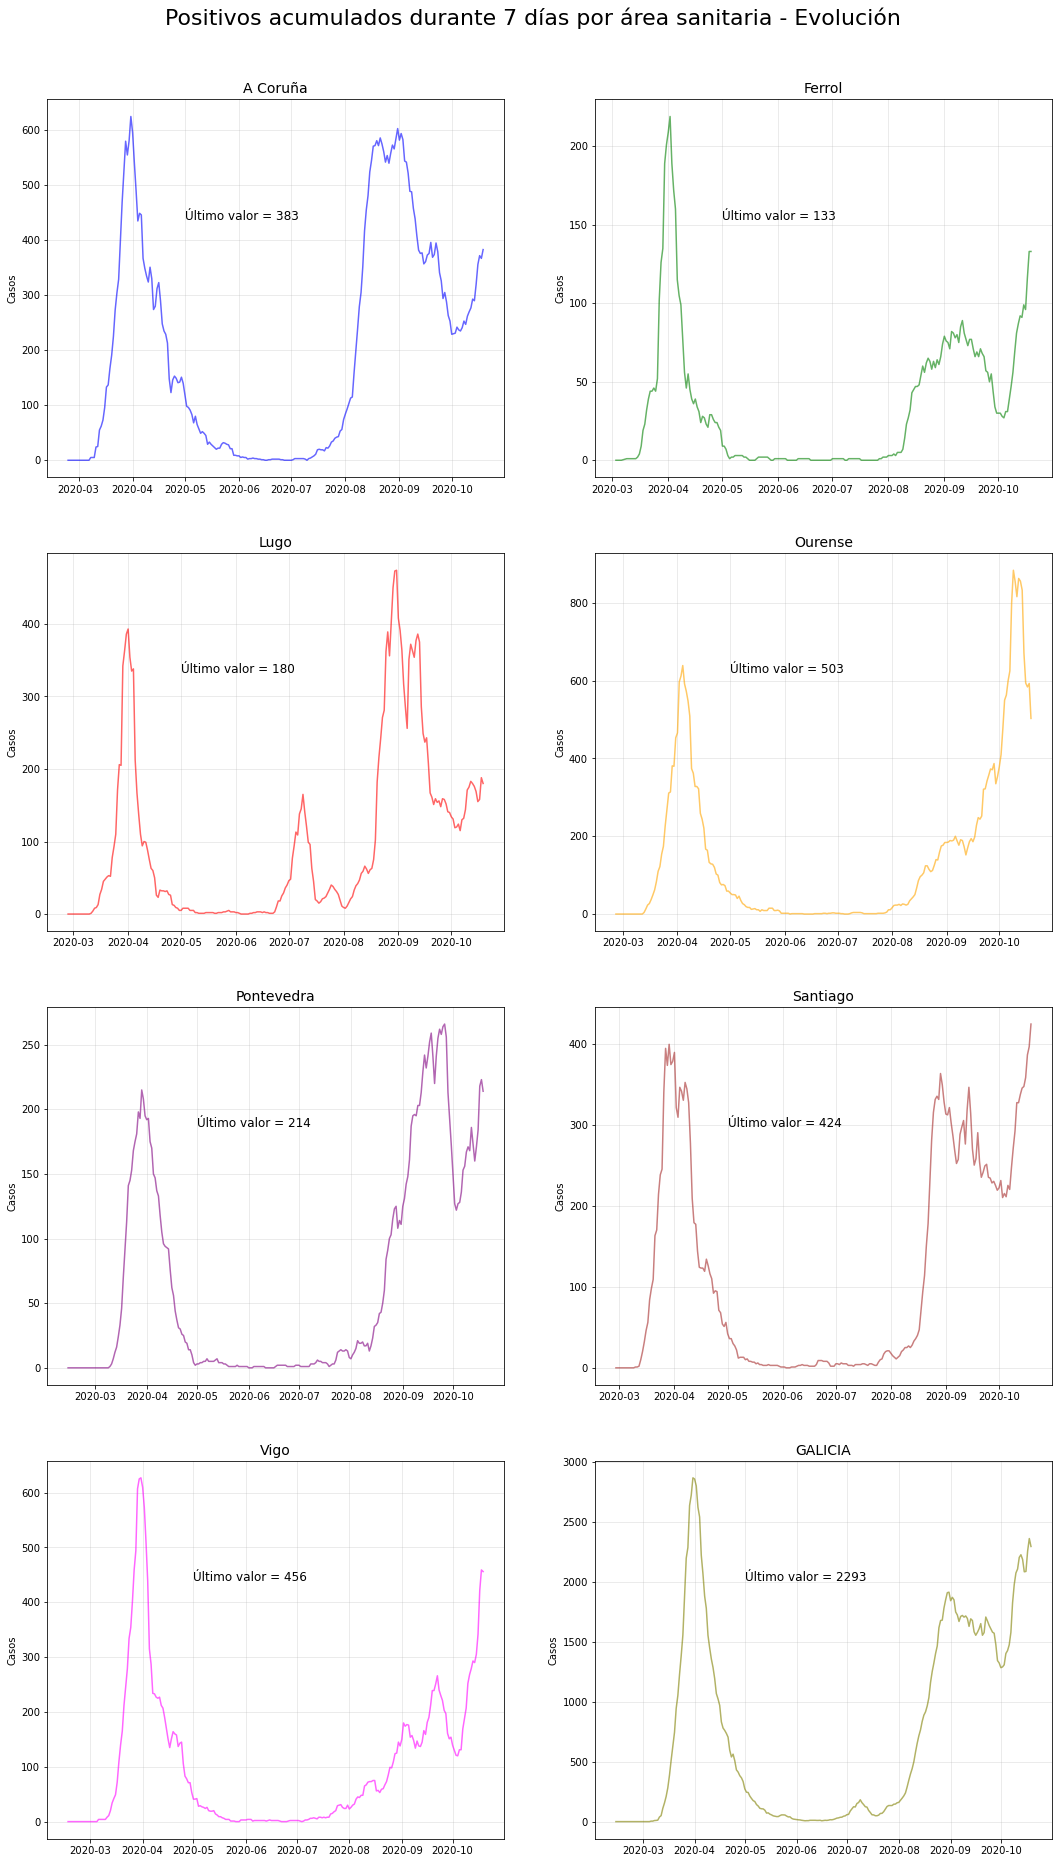

In [15]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(18,32)
fig.suptitle('Positivos acumulados durante 7 días por área sanitaria - Evolución', fontsize=22, y=0.92)

for i,ax in enumerate(axes.flatten()):
    df_temp = df_per_inf[['Fecha','Positivos']][df_per_inf['Area']==areas[i]]
    acu7 = list(df_temp['Positivos'].cumsum())
    for j in range(7,len(acu7)+1):
        acu7[j-1] = df_temp['Positivos'].iloc[j-7:j].sum()

    ax.plot(df_temp['Fecha'],acu7,color=colors[i],alpha=0.6)
    text_print = 'Último valor = ' + str(acu7[-1])
    ax.text(datetime.datetime.strptime('2020-05-01','%Y-%m-%d'),
            max(acu7)*0.7,
            text_print, color='black', size=12)
    ax.grid(alpha=0.3)
    ax.set_title(areas[i], fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('Casos') 

plt.savefig(datefile+'_positivos_7dias.png', dpi=90)

plt.show()

### 2.4.3. Evolución positivos acumulados últimos 14 días

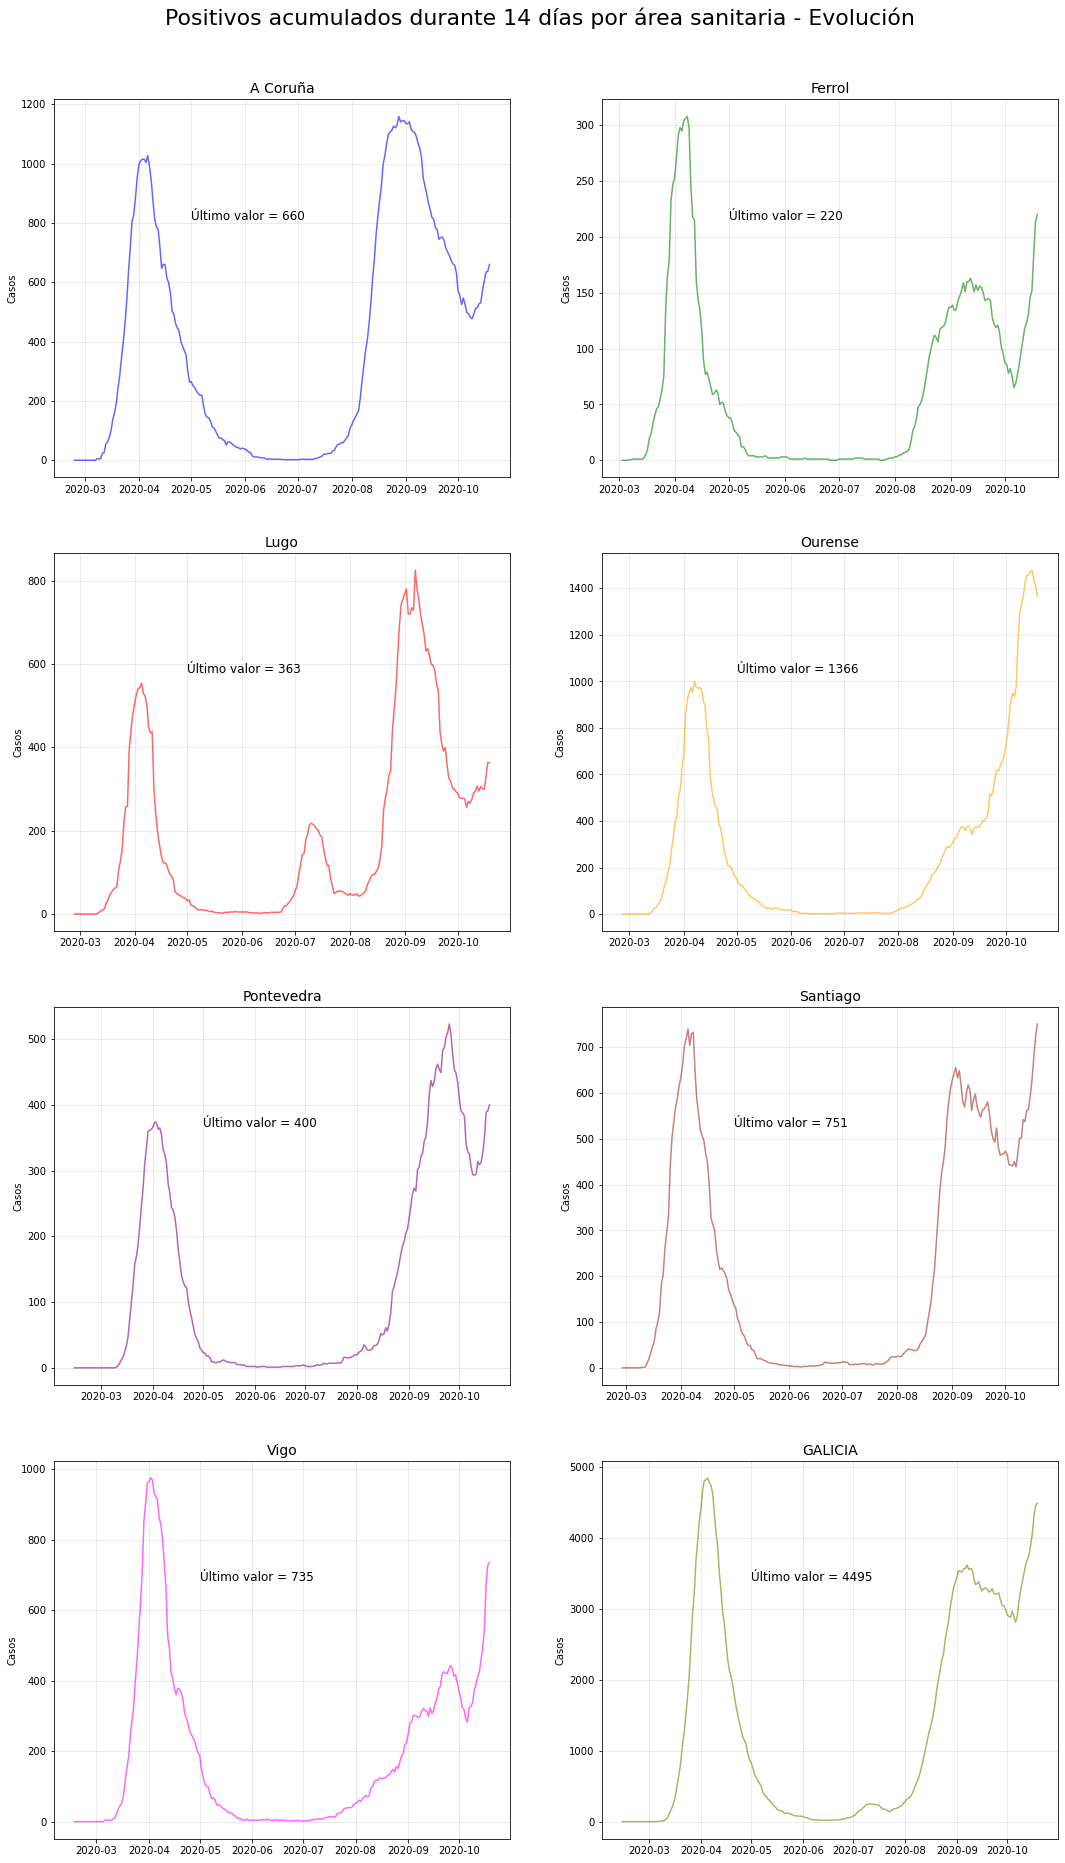

In [16]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(18,32)
fig.suptitle('Positivos acumulados durante 14 días por área sanitaria - Evolución', fontsize=22, y=0.92)

for i,ax in enumerate(axes.flatten()):
    df_temp = df_per_inf[['Fecha','Positivos']][df_per_inf['Area']==areas[i]]
    acu14 = list(df_temp['Positivos'].cumsum())
    for j in range(14,len(acu14)+1):
        acu14[j-1] = df_temp['Positivos'].iloc[j-14:j].sum()

    ax.plot(df_temp['Fecha'],acu14,color=colors[i],alpha=0.6)
    text_print = 'Último valor = ' + str(acu14[-1])
    ax.text(datetime.datetime.strptime('2020-05-01','%Y-%m-%d'),
            max(acu14)*0.7,
            text_print, color='black', size=12)
    ax.grid(alpha=0.3)
    ax.set_title(areas[i], fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('Casos') 

plt.savefig(datefile+'_positivos_14dias.png', dpi=90)

plt.show()

## 2.5. PCR

### 2.5.1. Evolución diaria de PCR positivas

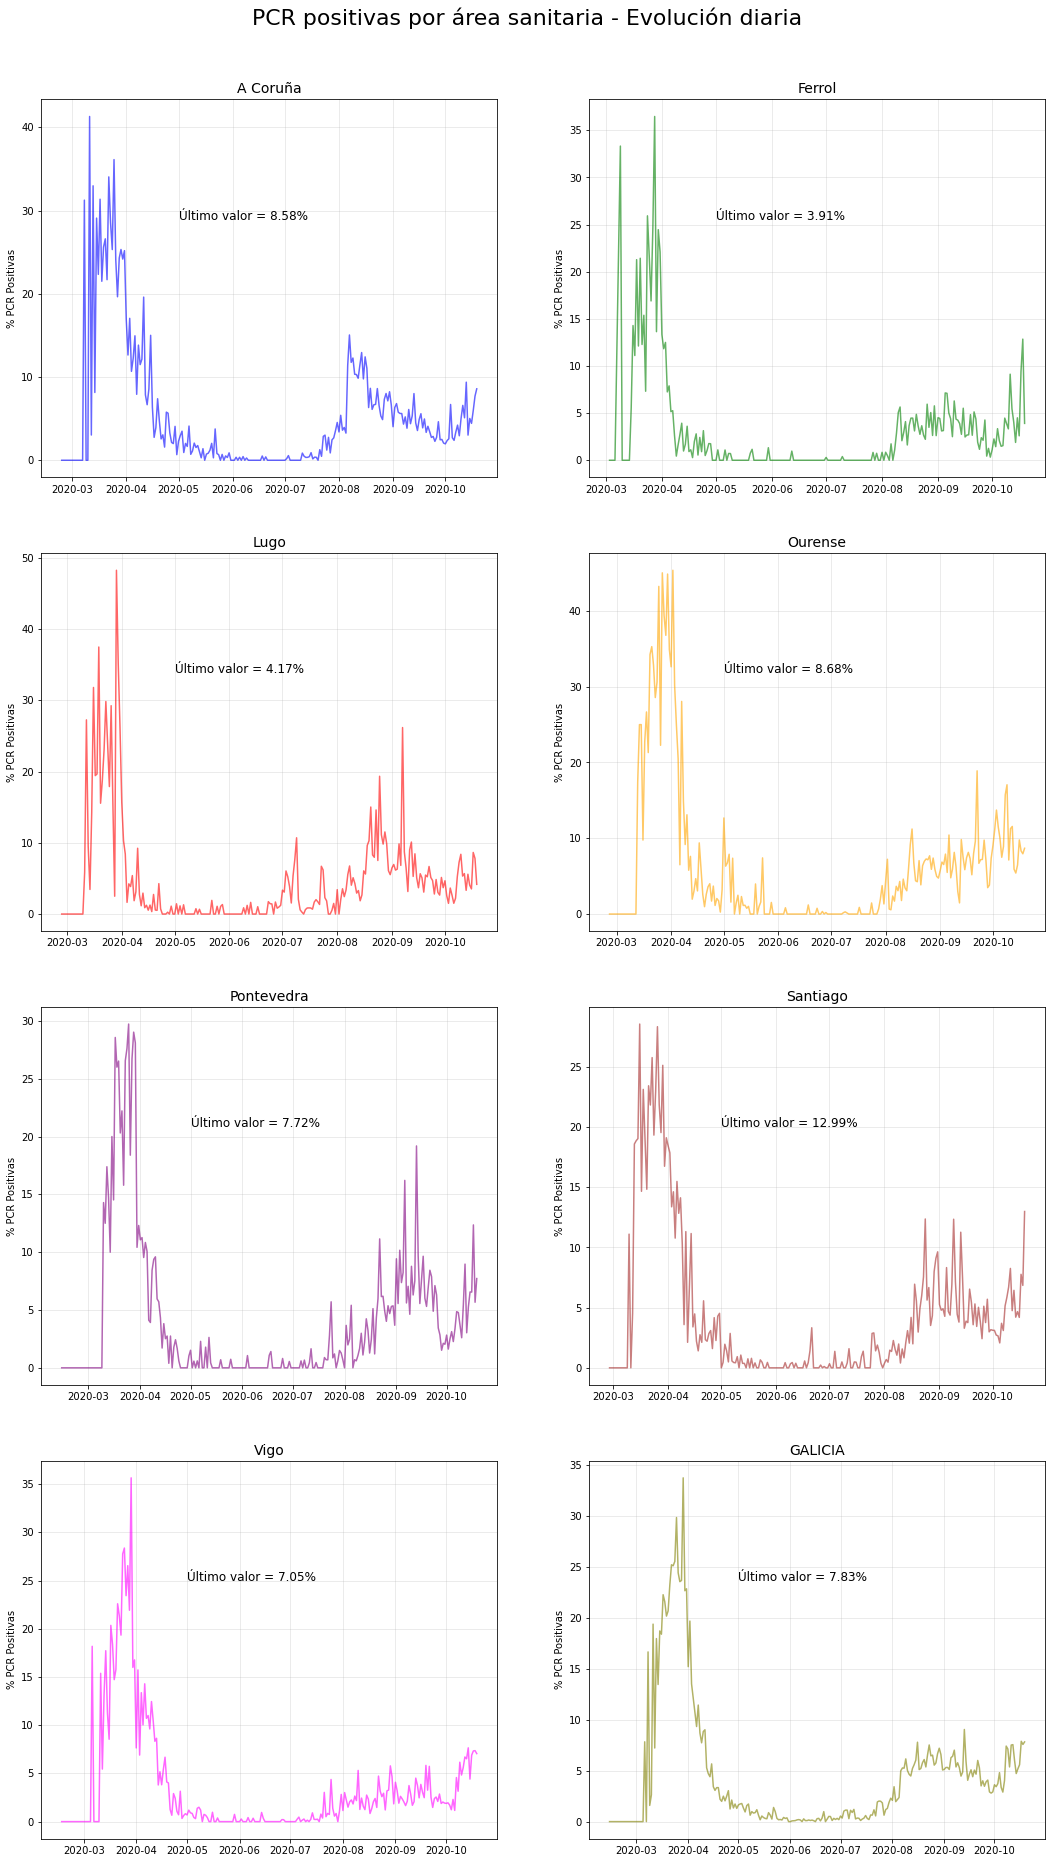

In [17]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(18,32)
fig.suptitle('PCR positivas por área sanitaria - Evolución diaria', fontsize=22, y=0.92)

for i,ax in enumerate(axes.flatten()):
    df_temp = df_per_inf[['Fecha','%Infecciones']][df_per_inf['Area']==areas[i]]

    ax.plot(df_temp['Fecha'],df_temp['%Infecciones'],color=colors[i],alpha=0.6)
    text_print = 'Último valor = ' + str(df_temp['%Infecciones'].iloc[-1]) + '%'
    ax.text(datetime.datetime.strptime('2020-05-01','%Y-%m-%d'),
            df_temp['%Infecciones'].max()*0.7,
            text_print, color='black', size=12)
    ax.grid(alpha=0.3)
    ax.set_title(areas[i], fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('% PCR Positivas') 

plt.savefig(datefile+'_PCR_positivas_por_area.png', dpi=90)

plt.show()

### 2.5.2. Evolución PCR positivas - 7 días

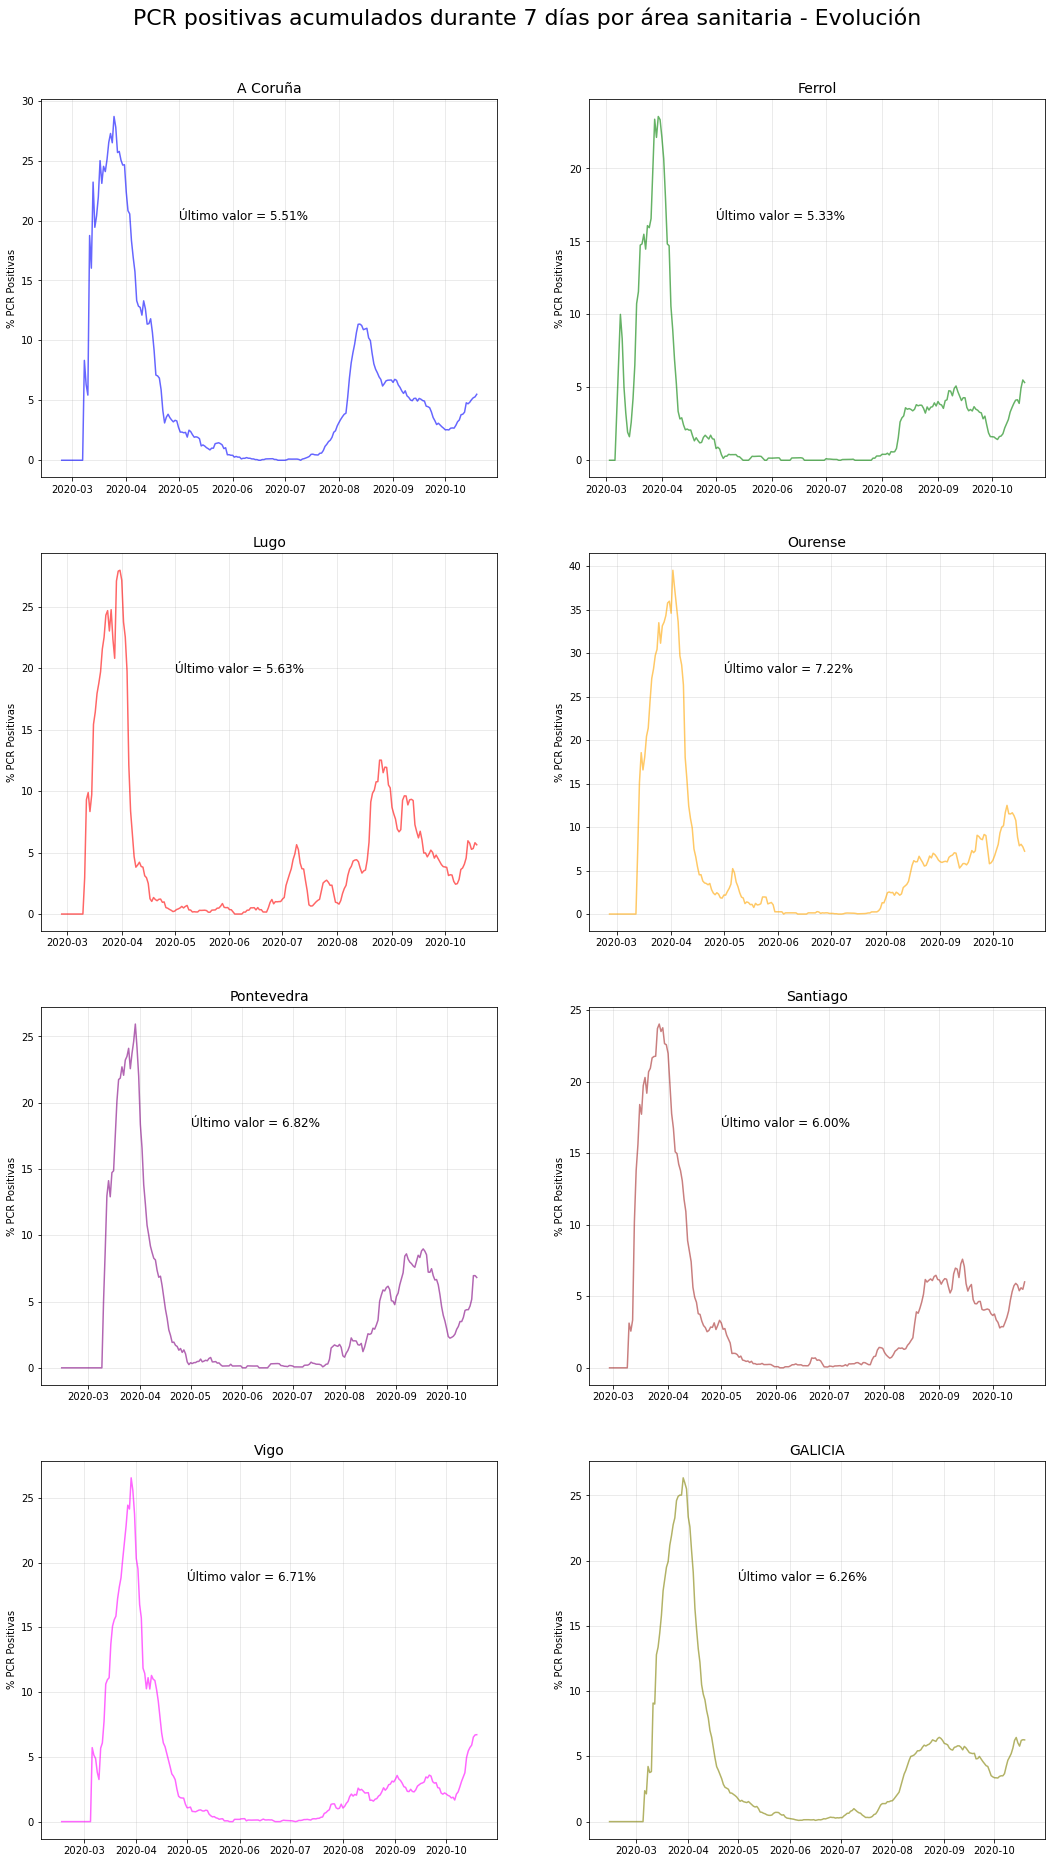

In [18]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(18,32)
fig.suptitle('PCR positivas acumulados durante 7 días por área sanitaria - Evolución', fontsize=22, y=0.92)

for i,ax in enumerate(axes.flatten()):
    df_temp = df_per_inf[['Fecha','Positivos','PCR']][df_per_inf['Area']==areas[i]]
    pcr7 = list(100*(df_temp['Positivos'].cumsum() / df_temp['PCR'].cumsum()))
    for j in range(7,len(pcr7)+1):
        pcr7[j-1] = 100*(df_temp['Positivos'].iloc[j-7:j].sum() / df_temp['PCR'].iloc[j-7:j].sum())

    ax.plot(df_temp['Fecha'],pcr7,color=colors[i],alpha=0.6)
    text_print = 'Último valor = {:.2f}'.format(pcr7[-1]) + '%'
    ax.text(datetime.datetime.strptime('2020-05-01','%Y-%m-%d'),
            max(pcr7)*0.7,
            text_print, color='black', size=12)
    ax.grid(alpha=0.3)
    ax.set_title(areas[i], fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('% PCR Positivas')

plt.savefig(datefile+'_PCR_positivas_7dias_por_area.png', dpi=90)

plt.show()

### 2.5.3. Evolución PCR positivas - 14 días

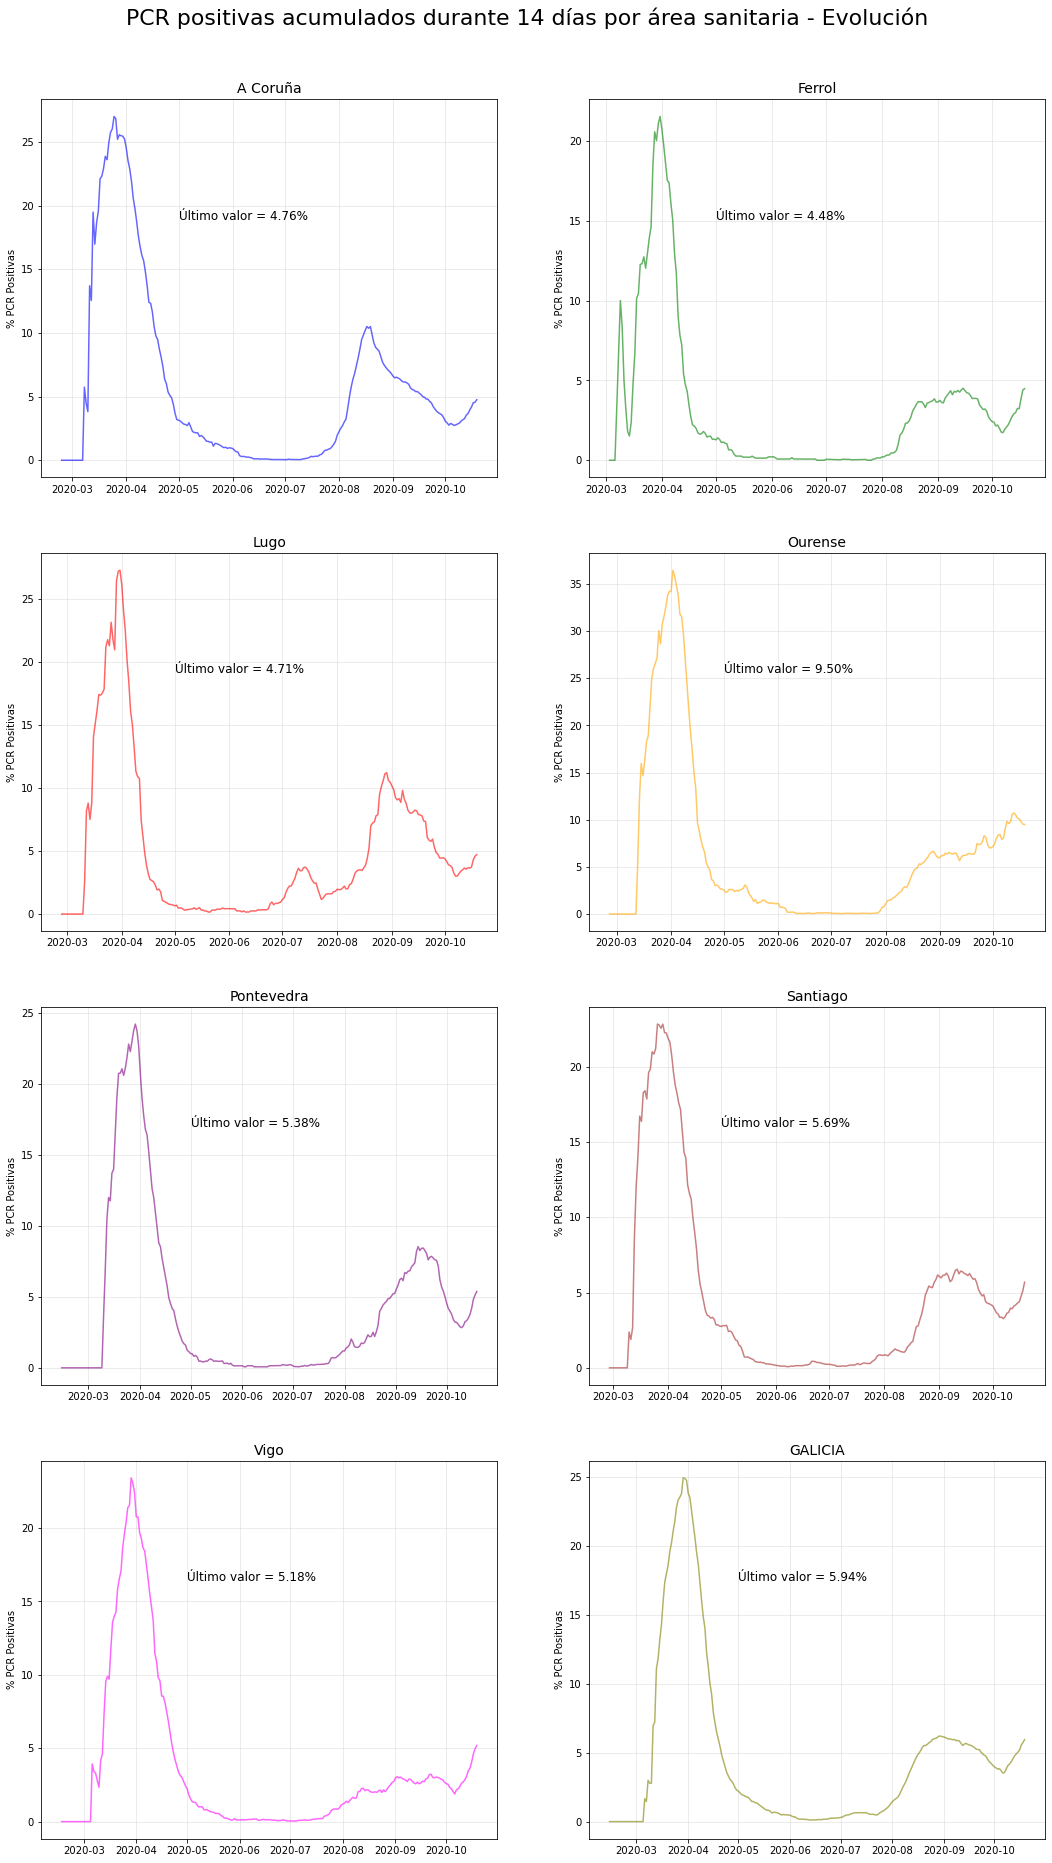

In [19]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(18,32)
fig.suptitle('PCR positivas acumulados durante 14 días por área sanitaria - Evolución', fontsize=22, y=0.92)

for i,ax in enumerate(axes.flatten()):
    df_temp = df_per_inf[['Fecha','Positivos','PCR']][df_per_inf['Area']==areas[i]]
    pcr14 = list(100*(df_temp['Positivos'].cumsum() / df_temp['PCR'].cumsum()))
    for j in range(14,len(pcr14)+1):
        pcr14[j-1] = 100*(df_temp['Positivos'].iloc[j-14:j].sum() / df_temp['PCR'].iloc[j-14:j].sum())

    ax.plot(df_temp['Fecha'],pcr14,color=colors[i],alpha=0.6)
    text_print = 'Último valor = {:.2f}'.format(pcr14[-1]) + '%'
    ax.text(datetime.datetime.strptime('2020-05-01','%Y-%m-%d'),
            max(pcr14)*0.7,
            text_print, color='black', size=12)
    ax.grid(alpha=0.3)
    ax.set_title(areas[i], fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel('% PCR Positivas')

plt.savefig(datefile+'_PCR_positivas_14dias_por_area.png', dpi=90)

plt.show()

## 2.6. Ocupación actual de camas

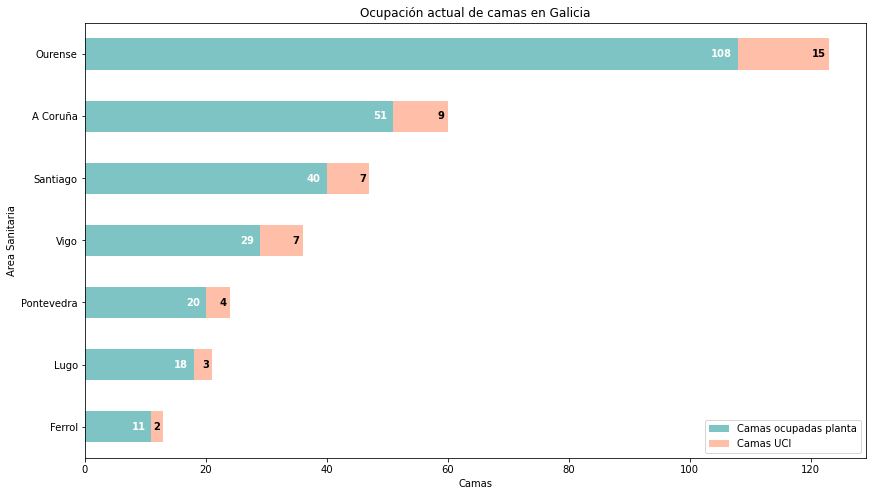

In [20]:
df_cama = df_cama.groupby(['Area_Sanitaria']).sum()
df_cama.sort_values('Camas_Ocupadas_HOS', ascending=True, axis=0, inplace=True)

df_cama.plot(kind='barh',stacked=True,figsize=(14,8),alpha=0.5,color=['darkcyan','coral'])

val_prev = []
for i,val in enumerate(df_cama['Camas_Ocupadas_HOS']):
    label = format(int(val), ',').replace(',','.')
    plt.annotate(label,xy=(val-1,i),color='white',fontweight='semibold',ha='right',va='center')
    val_prev.append(val)
for i,val in enumerate(df_cama['Camas_Ocupadas_UC']):
    if not val==0:
        label = format(int(val), ',').replace(',','.')
        plt.annotate(label,xy=(val_prev[i]+val-0.5,i),color='black',fontweight='semibold',ha='right',va='center')

plt.title('Ocupación actual de camas en Galicia')        
plt.xlabel('Camas')
plt.ylabel('Area Sanitaria')
plt.legend(['Camas ocupadas planta','Camas UCI'])
        
plt.savefig(datefile+'_camas_ocupadas_por_area.png')    
    
plt.show()